# Лабораторная работа №6 по вычислительной математике
## Численное решение обыкновенных дифференциальных уравнений. Методы Рунге-Кутты. Методы Адамса.
### Выполнил Филиппенко Павел -- студент группы Б01-009

##### Задание VIII.11.2

In [224]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# import scipy as sp

Будем решать ОДУ второго порядка -- уравнение Ван-дер-Поля.

$$y'' + e(y^2 - 1)y' + y = 0$$

где $e > 0$ -- некоторый параметр. 
Представим данное уравнение второго порядка в виде 
системы двух уравнений первого порядка:

$$
\begin{cases}
\frac{dx}{dt} = z \\
\frac{dz}{dt} = e(1 - x^2)z - x
\end{cases}
$$

$$x(0) = 2, ~~~ z(0) = 0, ~~~ 0 \leq t \leq 100$$

In [225]:
# set the "e" parametr in the equation
e = 8.6

In [226]:
def f(t, y):
    x = y[0]
    z = y[1]
    return np.array([z, e * (1 - x**2) * z - x])

Для решения бедм использовать явные методы: метод Рунге-Кутты 4 порядка и метод Адамса 4 порядка.

Опишем общую схему метода Рунге-Кутты:

$$\vec{y_{n+1}} = \vec{y_n} + h \sum_{i=1}^n b_i \vec{k_i}$$

Заметим, что приведенные формулы численного решения справедливы как для одиночных ОДУ, так и для
систем. В этом случае $\vec{y}$ представляет собой вектор переменных, а $\vec{k}$ -- соответственно 
вектор значений. Далее без ограничения обности будем считать при записи $\vec{y} = y$.

$$y_{n+1} = y_n + h \sum_{i=1}^n b_i k_i$$
$$k_i = f \left(x_n + c_i, y_n + h \sum_{j=1}^{s_i} a_{ij} k_i \right)$$

Коэффициенты $c_i, b_i, a_{ij}$ определяются таблицей Бутчера:

| $c_1$   | $a_{11}$ | $a_{12}$ | $\dots$ | $a_{1s}$ |
| :----:  | :------: | :------: | :------:| :------: |
| $c_2$   | $a_{21}$ | $a_{22}$ | $\dots$ | $a_{2s}$ |
| $\dots$ | $\dots$  | $\dots$  | $\dots$ | $\dots$  | 
| $c_s$   | $a_{s1}$ | $a_{s2}$ | $\dots$ | $a_{ss}$ |
|         | $b_1$    | $b_2$    | $\dots$ | $b_s$    |

Каждая таблица Бутчера задает соответсвующий метод. Рассмотрим метод Рунге-Кутты 4 порядка. Таблица
Бутчера для данного метода:

| 0      | 0             | 0                | 0             | 0                |
| :----: | :------:      | :------:         | :------:      | :------:         |
| 0.5    | 0.5           | 0                | 0             | 0                |
| 0.5    | 0             | 0.5              | 0             | 0                | 
| 1      | 0             | 0                | 1             | 0                |
|        | $\frac{1}{6}$ | $\frac{2}{6}$    | $\frac{2}{6}$ | $\frac{1}{6}$    |

Запишем соответствующие формулы для метода:

$$y_{n+1} = y_{n} + \frac{k_1 + 2 k_2 + 2 k_3 + k_4}{6} h$$
$$k_1 = f(t_n, y_n)$$
$$k_2 = f \left(t_n + \frac{h}{2}, y_n + \frac{h k_1}{2} \right)$$
$$k_3 = f \left(t_n + \frac{h}{2}, y_n + \frac{h k_2}{2} \right)$$
$$k_4 = f \left(t_n + h, y_n + h k_3 \right)$$

In [227]:
# Метод Рунге-Кутты 4 порядка
# Реализация для решения системы двух уравнений первого порядка (initial_solution -- вектор из 2 значений)
def MRK4(f, h, t_start, t_end, initial_solution):
    t = np.linspace(t_start, t_end, int((t_end-t_start)/h+1))
    # the system dimention is 2
    solution = np.zeros((int((t_end-t_start)/h+1), 2))
    solution[0] = initial_solution

    for i in range(len(t) - 1):
        k1 = f(t[i], solution[i])
        k2 = f(t[i] + h/2, solution[i] + h*k1 * 0.5)
        k3 = f(t[i] + h/2, solution[i] + h*k2 * 0.5)
        k4 = f(t[i] + h, solution[i] + h*k3)
        solution[i+1] = solution[i] + h*(k1 + 2*k2 + 2*k3 + k4) / 6
    return solution

In [228]:
h = 0.01
init_sol = np.array([2, 0])
t_start = 0
t_end = 100

sol = MRK4(f, h, t_start, t_end, init_sol)
x, z = sol.T
t = np.linspace(t_start, t_end, int((t_end-t_start)/h+1))

Text(0, 0.5, 'z')

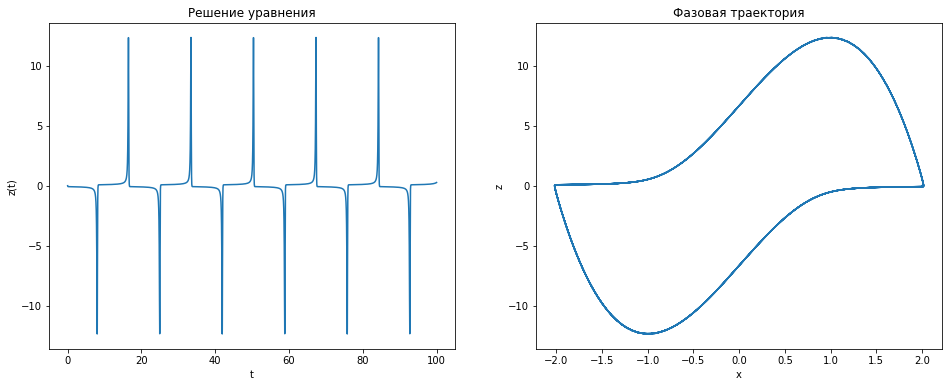

In [229]:
fig = plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(t, z)
plt.title('Решение уравнения')
plt.xlabel('t')
plt.ylabel('z(t)')

plt.subplot(1, 2, 2)
plt.plot(x, z)
plt.title('Фазовая траектория')
plt.xlabel('x')
plt.ylabel('z')

In [230]:
# Метод Адамса 4 порядка.
# Реализация для решения системы двух уравнений первого порядка (solution[i] -- вектор из 2 значений)
# initial_solution -- кортеж, содержащий 4 начальные точки
def Adams_mthd4(f, h, t_start, t_end, initial_solution: tuple):
    t = np.linspace(t_start, t_end, int((t_end-t_start)/h+1))
    # the system dimention is 2
    solution = np.zeros((int((t_end-t_start)/h+1), 2))
    for i in range(len(initial_solution)):
        solution[i] = initial_solution[i]
    
    for i in range(len(t)-4):
        solution[i+4] = solution[i+3] + h * (
            55/24 * f(t[i+3], solution[i+3]) - \
            59/24 * f(t[i+2], solution[i+2]) + \
            37/24 * f(t[i+1], solution[i+1]) - \
            3/8   * f(t[i], solution[i])
        )
    return solution

Запишем формулу для метода Адамса 4 порядка:

$$y_{n+4} = h \left(\frac{55}{24} f(t_{n+3}, y_{n+3}) - \frac{59}{24} f(t_{n+2}, y_{n+2}) + \frac{37}{24} f(t_{n+1}, y_{n+1}) - \frac{3}{8} f(t_{n}, y_{n}) \right)$$

Заметим, что в отличие от метода Рунге-Кутты, для реализации метода Адамса 4 порядка необходимо знать 
значения функции в трех узлах сетки. Эти три значения будем вычислять с помощью другого численного 
метода.

In [231]:
# Для метода Адамса первые 4 точки найдем с помощью метода Рунге-Кутты 4 порядка
h = 0.01
t_start = 0
t_end = 100
init_sol = MRK4(f, h, t_start, t_start+h*3, np.array([2, 0]))

sol = Adams_mthd4(f, h, t_start, t_end, tuple(init_sol))
x, z = sol.T
t = np.linspace(t_start, t_end, int((t_end-t_start)/h+1))

Text(0, 0.5, 'z')

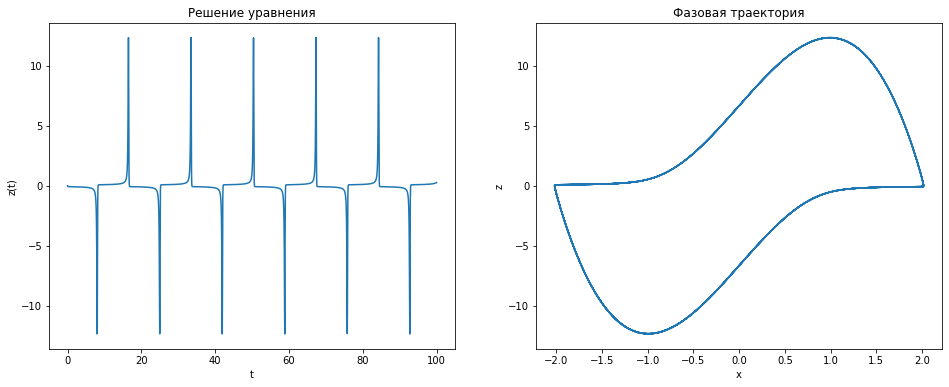

In [232]:
fig = plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(t, z)
plt.title('Решение уравнения')
plt.xlabel('t')
plt.ylabel('z(t)')

plt.subplot(1, 2, 2)
plt.plot(x, z)
plt.title('Фазовая траектория')
plt.xlabel('x')
plt.ylabel('z')

Воспользуемся библиотечным методом решения ОДУ для проверки.

In [233]:
def f1(S, t) -> list:
    x, z = S
    return [z, e * (1 - x**2) * z - x]

In [234]:
h = 0.01
t_start = 0
t_end = 100
t = np.linspace(t_start, t_end, int((t_end-t_start)/h+1))

sol = odeint(f1, (2, 0), t)
x, z = sol.T

Text(0, 0.5, 'z')

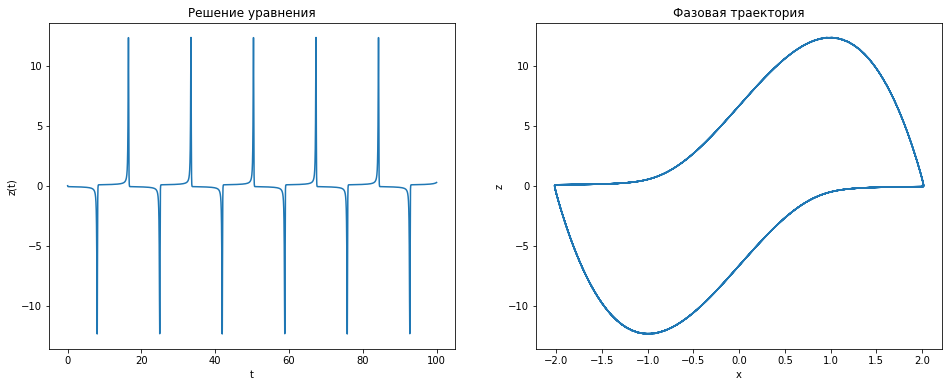

In [235]:
fig = plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(t, z)
plt.title('Решение уравнения')
plt.xlabel('t')
plt.ylabel('z(t)')

plt.subplot(1, 2, 2)
plt.plot(x, z)
plt.title('Фазовая траектория')
plt.xlabel('x')
plt.ylabel('z')

Рассмотрим вид решения в зависимости от параметра $e$.

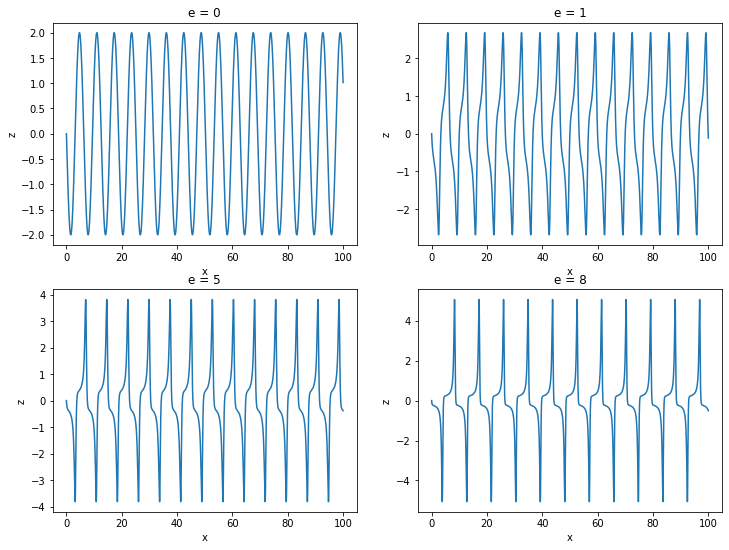

In [244]:
h = 0.01
init_sol = np.array([2, 0])
t_start = 0
t_end = 100
t = np.linspace(t_start, t_end, int((t_end-t_start)/h+1))

fig = plt.figure(figsize=(12, 9))

e_range = np.array([0, 1, 5, 8])
for i in range(4):
    e = i   
    sol = MRK4(f, h, t_start, t_end, init_sol)  
    x, z = sol.T

    plt.subplot(2, 2, i+1)
    plt.plot(t, z)
    plt.title(f'e = {e_range[i]}')
    plt.xlabel('x')
    plt.ylabel('z')

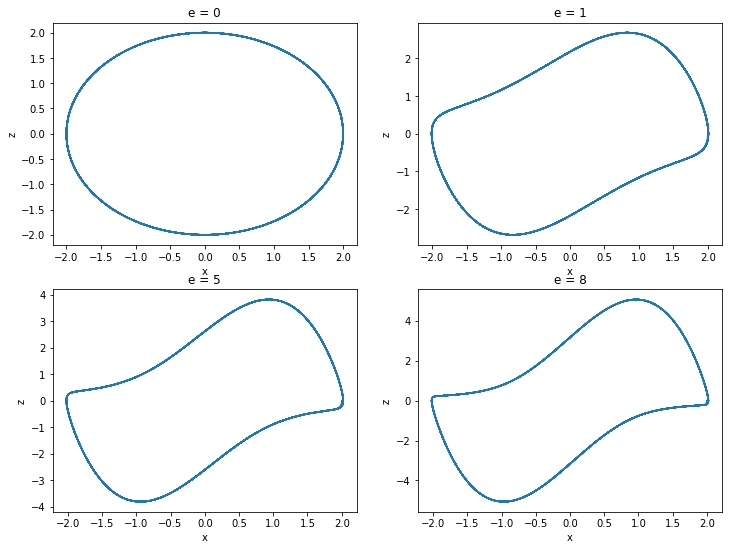

In [245]:
h = 0.01
init_sol = np.array([2, 0])
t_start = 0
t_end = 100
t = np.linspace(t_start, t_end, int((t_end-t_start)/h+1))

fig = plt.figure(figsize=(12, 9))

e_range = np.array([0, 1, 5, 8])
for i in range(4):
    e = i   
    sol = MRK4(f, h, t_start, t_end, init_sol)  
    x, z = sol.T

    plt.subplot(2, 2, i+1)
    plt.plot(x, z)
    plt.title(f'e = {e_range[i]}')
    plt.xlabel('x')
    plt.ylabel('z')